# Imports

In [1]:
import sys
sys.path.insert(1, '../')
from genesis import *

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
# pd.options.display.max_rows = 300

In [3]:
# Asia FX
universe = ASIA_FX
total_returns = total_returns_usd[universe]
spot_returns = spot_returns_usd[universe]
carry_returns = carry_returns_usd[universe]

# Settings

In [4]:
settings = Settings(start_date = "2000-01-01", end_date = "2016-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=130,
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=130,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=260)

# Other Data

In [5]:
corp_spread = pd.read_csv("../../Dymon/Code Data/spread.csv", index_col=0).iloc[2:]
corp_spread = corp_spread.astype(float)
corp_spread.index = pd.to_datetime(corp_spread.index)

In [6]:
pd.options.display.max_rows = 6000

In [7]:
corp_spread

,LGCPOAS Index,LG50OAS Index
ticker,,
2000-09-29,1.05,NaN
2000-10-31,1.20,NaN
2000-11-30,1.29,25.9806
2000-12-29,1.30,13.7945
2001-01-16,1.25,NaN
2001-01-17,1.23,NaN
2001-01-18,1.21,NaN
2001-01-19,1.20,NaN
2001-01-22,1.20,NaN


# Signal

In [8]:
sig1 = corp_spread["LGCPOAS Index"].pipe(fill_date, True).pipe(omit_trailing_na).pipe(zscore, 252).pipe(cap_helper, 2)
sig2 = corp_spread["LG50OAS Index"].loc["2010-06-15":].pipe(fill_date, True).pipe(omit_trailing_na).pipe(zscore, 252*3).pipe(cap_helper, 2)
sig = sig1
signal = sig.pipe(rolling_mean, 5)
# signal.plot()
sig = pd.concat([signal] * len(total_returns.columns), axis=1)
sig.columns = total_returns.columns
sig.index = pd.to_datetime(sig.index)

In [9]:
b = Backtest(signal = sig, asset_returns = total_returns, tcost = abs(total_returns*0), settings = settings)
b.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [10]:
bt_obj = b

In [11]:
get_summary(bt_obj)

Returns   : 0.042397863011546126
Vol       : 0.12060039563185906
SR        : 0.3515565831224012
Max DD    : -47.96

C Returns : 0.03576908455121412
C SR      : 0.28465629225444444
C Max DD  : -39.76

Hit rate  : 0.507
W | N | L : 0.51 | 0.0 | 0.49
W/L Ratio : 1.03


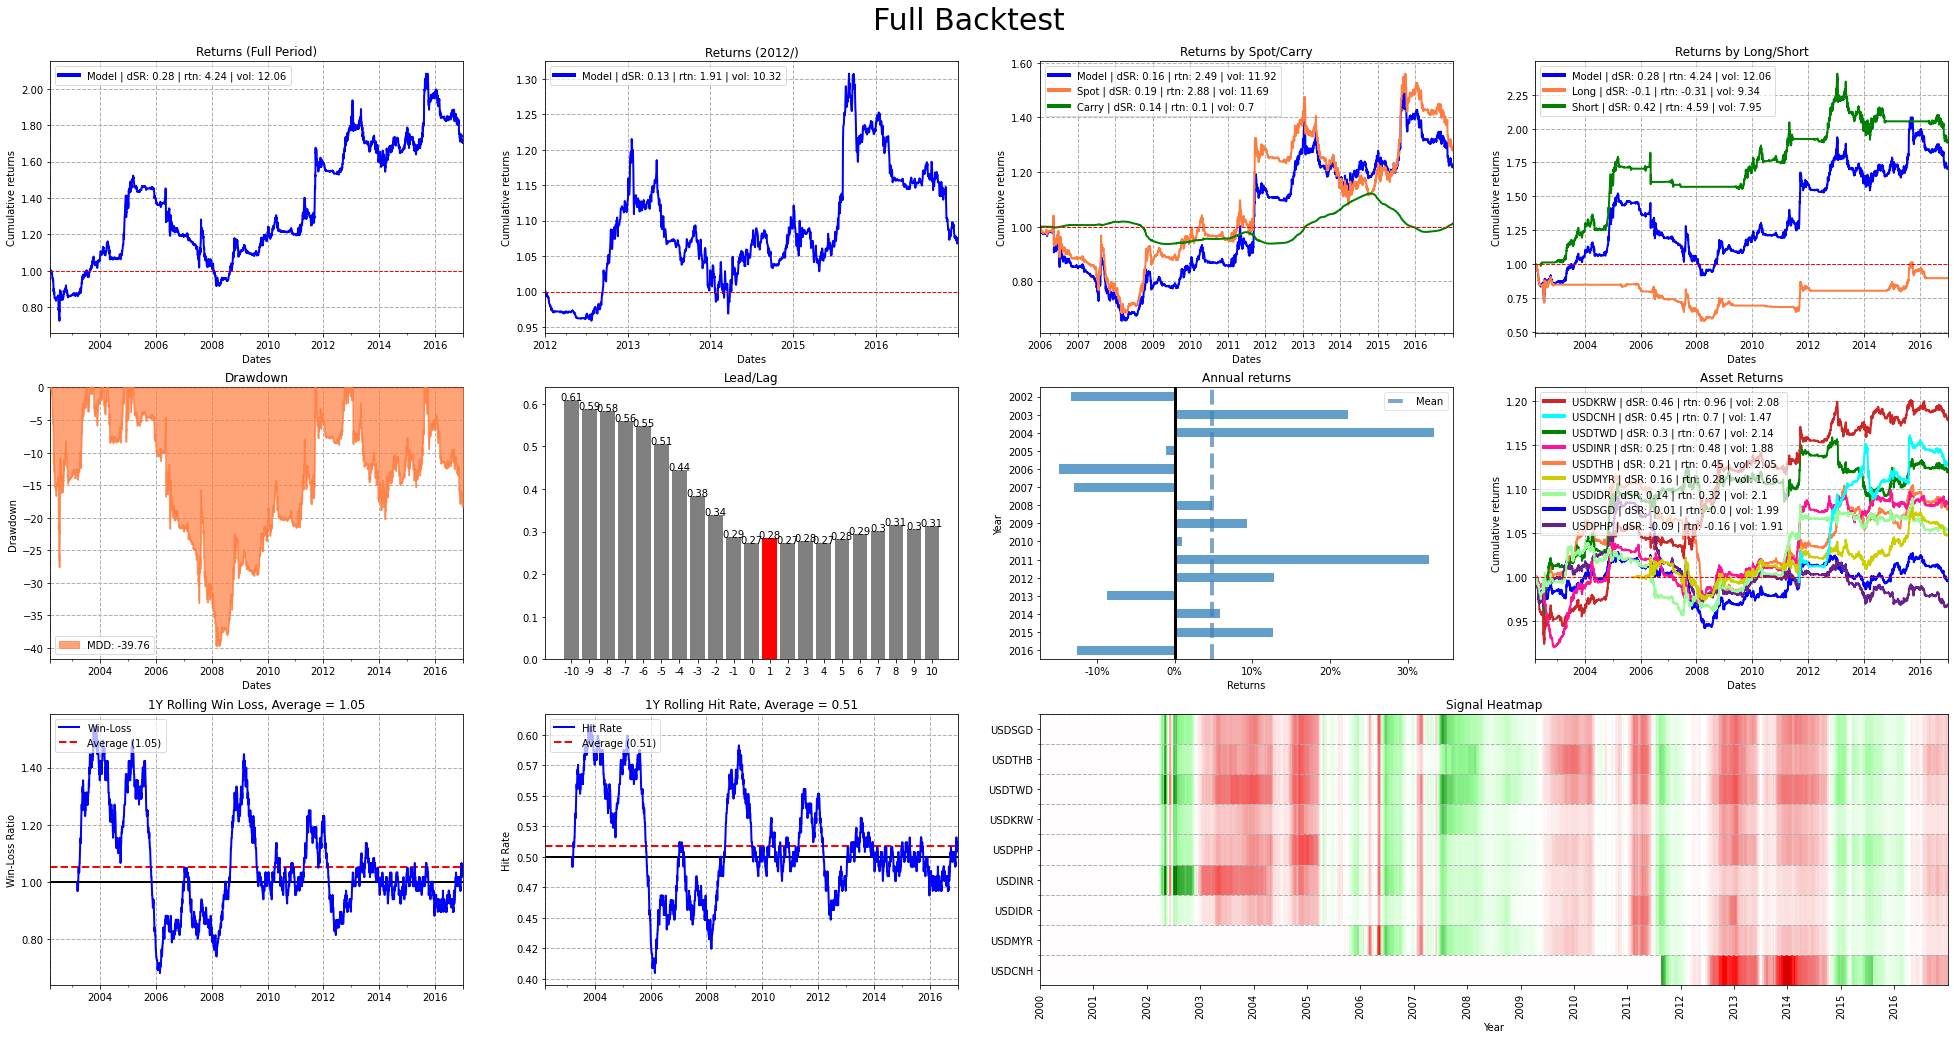

In [12]:
plot_bt(bt_obj)

<AxesSubplot:title={'center':'Monthly returns (%)'}, xlabel='Month', ylabel='Year'>

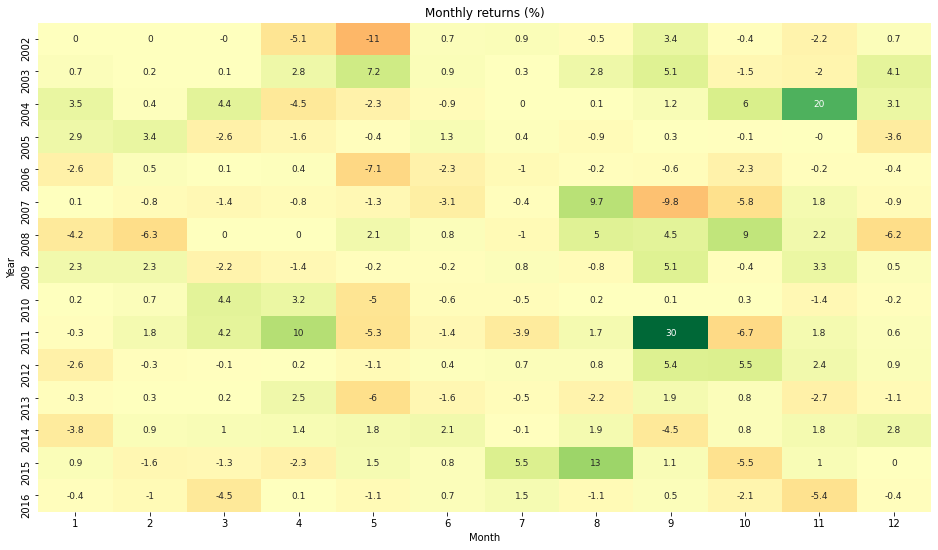

In [13]:
pf.plot_monthly_returns_heatmap(bt_obj.model_rtn)

<AxesSubplot:title={'center':'Distribution of monthly returns'}, xlabel='Returns', ylabel='Number of months'>

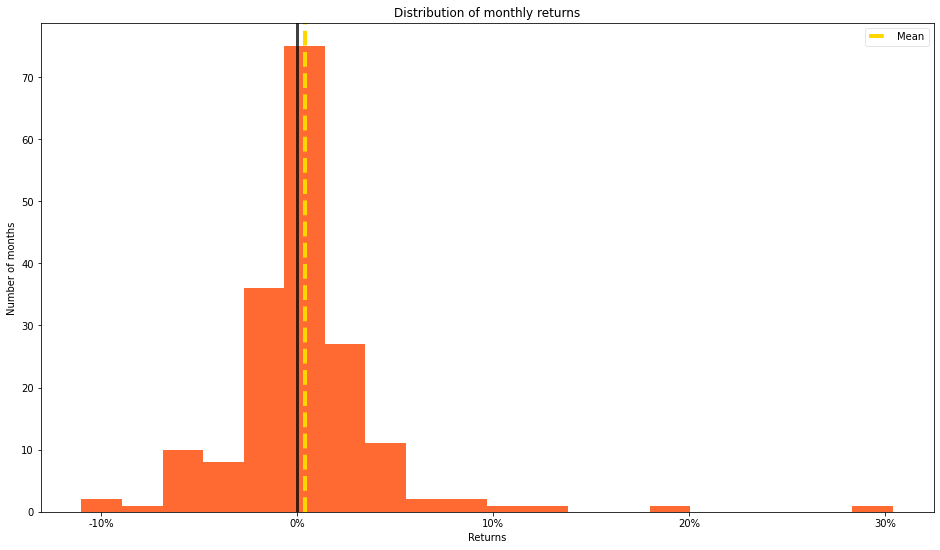

In [14]:
pf.plot_monthly_returns_dist(bt_obj.model_rtn)

In [15]:
# gs = GridSpec(nrows = 2, ncols = 2)
# fig = plt.figure(figsize=(20, 15))
# fig.suptitle(t="Full Backtest", fontsize=30, y=.925)

# fig.add_subplot(gs[0]).set_label(gen_plot_rtn(bt_obj.model_rtn, main = "Returns (Full Period)"))
# fig.add_subplot(gs[1]).set_label(gen_rtn_asset(bt_obj))
# fig.add_subplot(gs[2]).set_label(pf.plot_drawdown_underwater(bt_obj.model_rtn))
# fig.add_subplot(gs[3]).set_label(gen_rtn_longshort(bt_obj))

In [16]:
# gen_rtn_longshort(bt_obj)
# gen_rtn_component(bt_obj, spot_rtns, carry_rtns)
# gen_leadlag(b, nlag=20)
# gen_rolling_hitrate(bt_obj.model_rtn)
# gen_rolling_winloss(bt_obj.model_rtn)
# pf.plot_monthly_returns_dist(bt_obj.model_rtn)
# pf.plot_annual_returns(bt_obj.model_rtn)
# gen_signal(bt_obj)
# gen_rtn_asset(bt_obj)
# gen_plot_rtn(bt_obj.model_rtn["2012":])
# gen_rolling_sharpe(bt_obj.model_rtn)
# gen_rtn_col_component(bt_obj, spot_rtns, carry_rtns)
# gen_rtn_col_longshort(bt_obj)

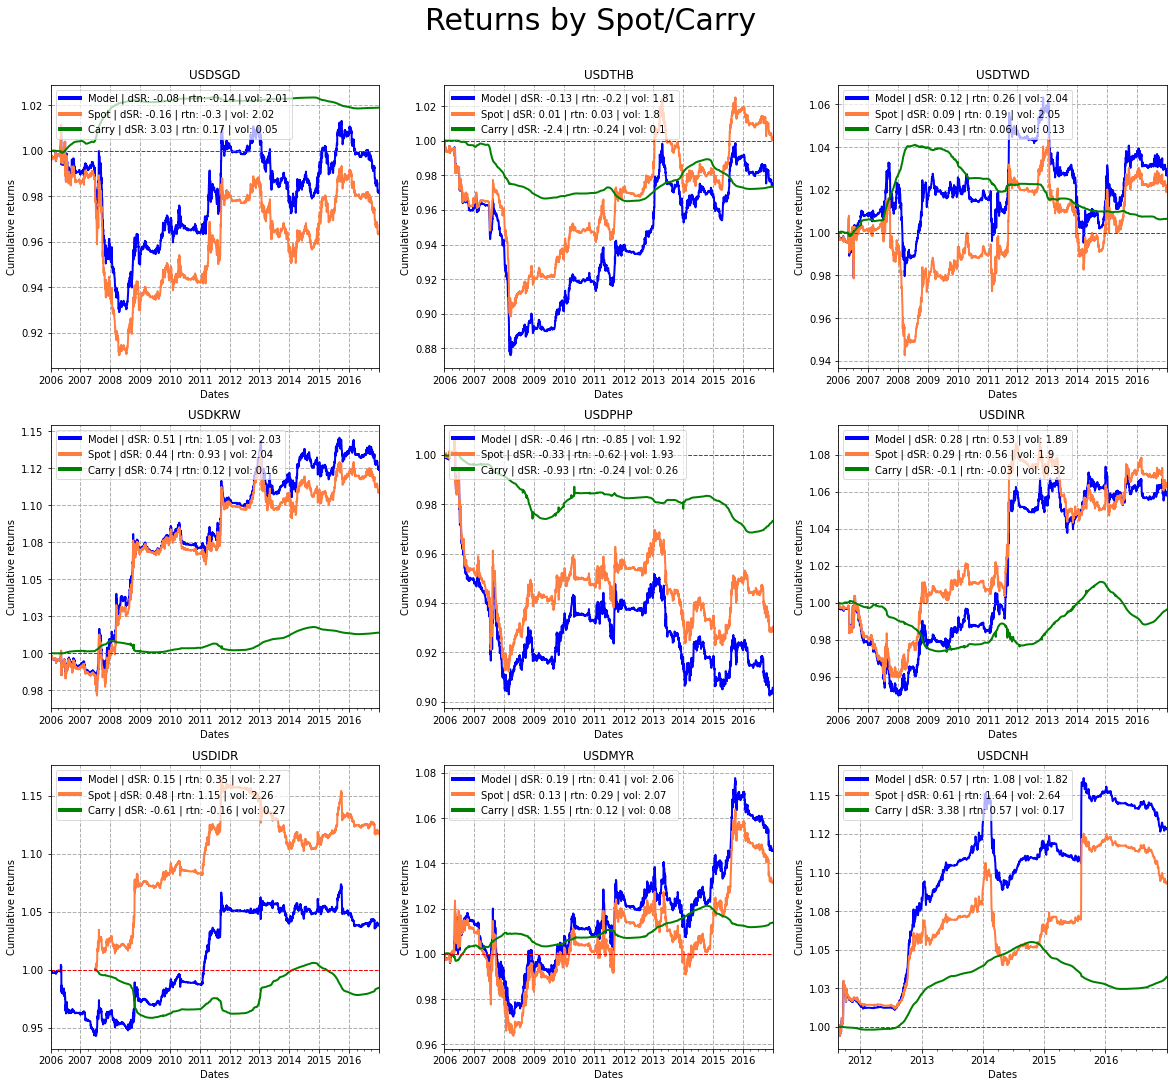

In [17]:
gen_rtn_col_component(bt_obj, spot_returns.loc[:"2016-12-31"], carry_returns.loc[:"2016-12-31"])

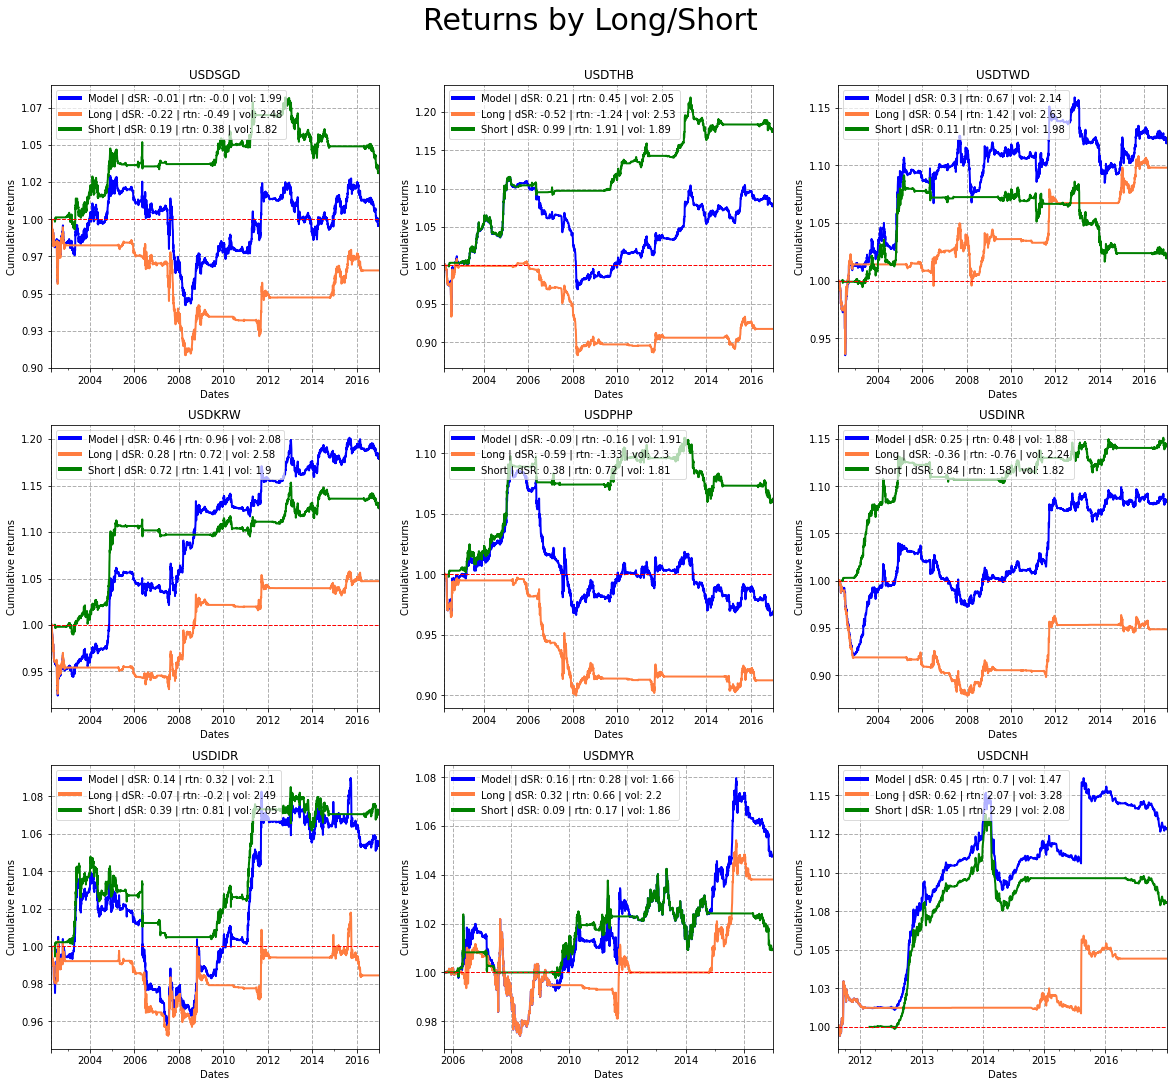

In [18]:
gen_rtn_col_longshort(bt_obj)